In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearchv4 import *

Cores:  12


/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:923: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

Done.


In [4]:
mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U']
    X = df.drop(drop_cols, axis=1)
    return X


X = mtr.modified_dataset(getAllData(df)) #
f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

scaler = StandardScaler()
scaler = RobustScaler()
scaler.fit(X)
Z = scaler.transform(X)




Loaded MyTotoResearch algo_no:  1
1521


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

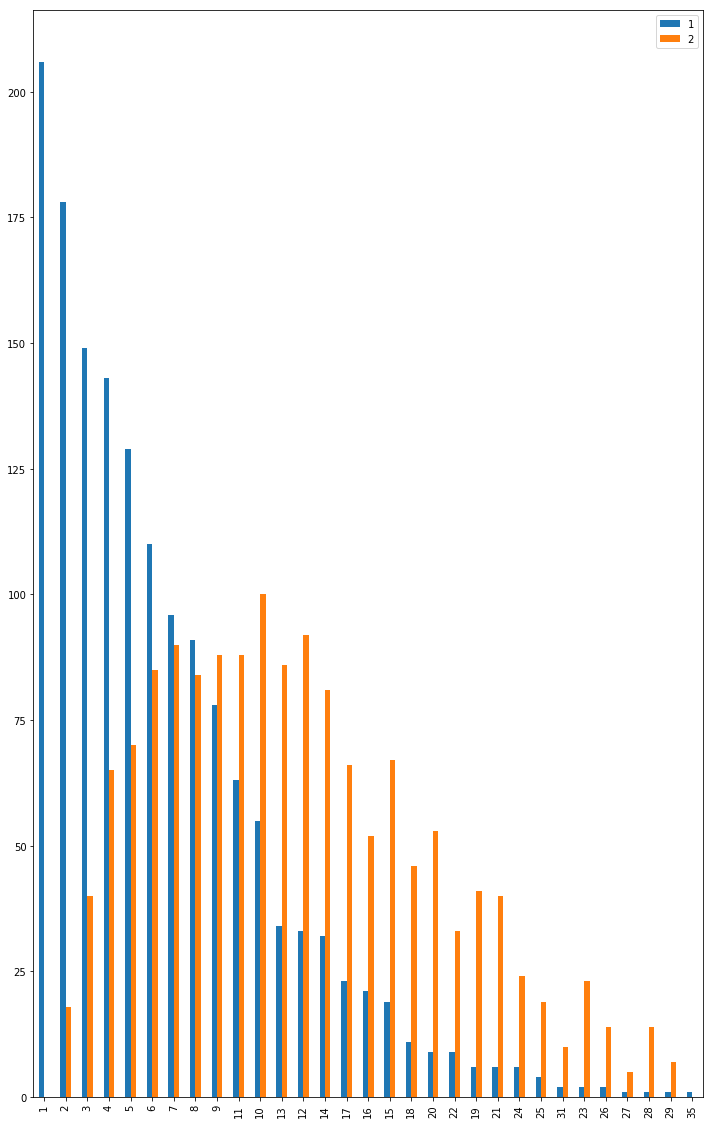

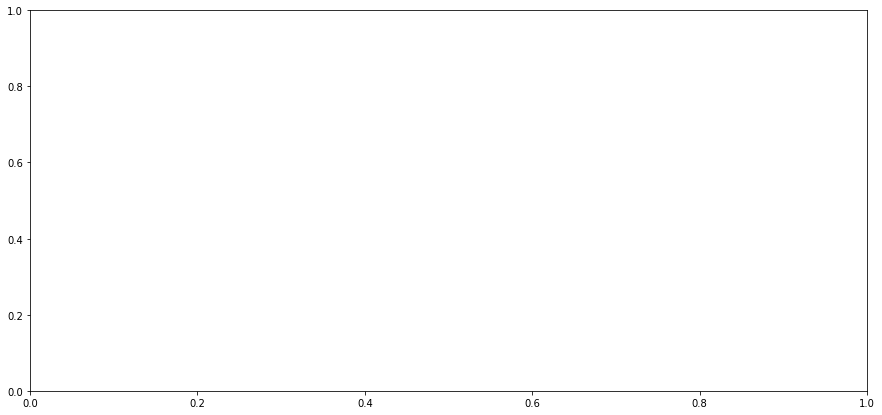

In [30]:
fig, ax = plt.subplots()
hist_data = pd.DataFrame()
hist_data['1'] = drawn_numbers['N1'].value_counts()
hist_data['2'] = drawn_numbers['N2'].value_counts()

hist_data.plot(ax=ax, kind='bar')

fig, ax = plt.subplots(figsize=(15,7))
drawn_numbers.groupby(['N1','N2','N3']).value_counts().plot(ax=ax)
#['amount'].plot(ax=ax)


In [18]:
drawn_numbers = df[['N1','N2','N3','N4','N5','N6','N7']].astype(int)
import seaborn as sns
import matplotlib as mpl
print(drawn_numbers.stats())

#mpl.rc("figure", figsize=(12, 20))
#ax = sns.countplot(y="Number", data=drawn_numbers)

AttributeError: 'DataFrame' object has no attribute 'stats'